In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
trainF = pd.read_csv('/content/drive/MyDrive/dataset/training_set_features.csv')
trainL = pd.read_csv('/content/drive/MyDrive/dataset/training_set_labels.csv')

testF = pd.read_csv('/content/drive/MyDrive/dataset/test_set_features.csv')

In [49]:
print("train fetures : ",trainF.shape)
print("train labels  : ", trainL.shape)
print("test fetures  : ",testF.shape)

train fetures :  (26707, 36)
train labels  :  (26707, 3)
test fetures  :  (26708, 36)


In [50]:
trainF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [51]:
columns_to_drop = ['health_insurance', 'employment_industry', 'employment_occupation']
trainF.drop(columns=columns_to_drop, inplace=True)

In [52]:
trainF.isnull().sum()

respondent_id                     0
xyz_concern                      92
xyz_knowledge                   116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                 

In [53]:
trainF.head(3)

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0


## Data cleaning

In [54]:
categorical_vars = ['education', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status']
for var in categorical_vars:
    trainF[var].fillna(trainF[var].mode()[0], inplace=True)

In [55]:
ordinal_numerical_vars = ['xyz_concern', 'xyz_knowledge']
for var in ordinal_numerical_vars:
    trainF[var].fillna(trainF[var].median(), inplace=True)

In [56]:
binary_vars = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands','chronic_med_condition', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'child_under_6_months', 'health_worker']

for var in binary_vars:
    trainF[var].fillna(0, inplace=True)

In [57]:
trainF.isnull().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                         0
race                              0
sex                               0
income_poverty                    0
marital_status                    0
rent_or_own                 

In [58]:
trainF['household_adults'].fillna(0, inplace=True)
trainF['household_children'].fillna(0, inplace=True)

In [59]:
opinion_cols = ['opinion_xyz_vacc_effective', 'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc',
                'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

for col in opinion_cols:
    trainF[col].fillna(trainF[col].median(), inplace=True)


In [60]:
trainF['doctor_recc_xyz'].fillna(trainF['doctor_recc_xyz'].mode()[0], inplace=True)
trainF['doctor_recc_seasonal'].fillna(trainF['doctor_recc_seasonal'].mode()[0], inplace=True)

In [61]:
trainF.isnull().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [62]:
columns_to_drop = ['health_insurance', 'employment_industry', 'employment_occupation']
testF.drop(columns=columns_to_drop, inplace=True)

categorical_vars = ['education', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status']
for var in categorical_vars:
    testF[var].fillna(testF[var].mode()[0], inplace=True)

ordinal_numerical_vars = ['xyz_concern', 'xyz_knowledge']
for var in ordinal_numerical_vars:
    testF[var].fillna(testF[var].median(), inplace=True)

binary_vars = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands','chronic_med_condition', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'child_under_6_months', 'health_worker']

for var in binary_vars:
    testF[var].fillna(0, inplace=True)

testF['household_adults'].fillna(0, inplace=True)
testF['household_children'].fillna(0, inplace=True)

opinion_cols = ['opinion_xyz_vacc_effective', 'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc',
                'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

for col in opinion_cols:
    testF[col].fillna(testF[col].mean(), inplace=True)

testF['doctor_recc_xyz'].fillna(testF['doctor_recc_xyz'].mode()[0], inplace=True)
testF['doctor_recc_seasonal'].fillna(testF['doctor_recc_seasonal'].mode()[0], inplace=True)

In [63]:
trainF.isnull().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [64]:
print("train fetures : ",trainF.shape)
print("train labels  : ", trainL.shape)
print("test fetures  : ",testF.shape)

train fetures :  (26707, 33)
train labels  :  (26707, 3)
test fetures  :  (26708, 33)


In [65]:
trainF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26707 non-null  float64
 2   xyz_knowledge                26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

# Transformation

In [66]:
for column in trainF:
    print(f"Unique values in '{column}':")
    print(trainF[column].unique())
    print()

Unique values in 'respondent_id':
[    0     1     2 ... 26704 26705 26706]

Unique values in 'xyz_concern':
[1. 3. 2. 0.]

Unique values in 'xyz_knowledge':
[0. 2. 1.]

Unique values in 'behavioral_antiviral_meds':
[0. 1.]

Unique values in 'behavioral_avoidance':
[0. 1.]

Unique values in 'behavioral_face_mask':
[0. 1.]

Unique values in 'behavioral_wash_hands':
[0. 1.]

Unique values in 'behavioral_large_gatherings':
[0. 1.]

Unique values in 'behavioral_outside_home':
[1. 0.]

Unique values in 'behavioral_touch_face':
[1. 0.]

Unique values in 'doctor_recc_xyz':
[0. 1.]

Unique values in 'doctor_recc_seasonal':
[0. 1.]

Unique values in 'chronic_med_condition':
[0. 1.]

Unique values in 'child_under_6_months':
[0. 1.]

Unique values in 'health_worker':
[0. 1.]

Unique values in 'opinion_xyz_vacc_effective':
[3. 5. 4. 2. 1.]

Unique values in 'opinion_xyz_risk':
[1. 4. 3. 2. 5.]

Unique values in 'opinion_xyz_sick_from_vacc':
[2. 4. 1. 5. 3.]

Unique values in 'opinion_seas_vacc_eff

In [67]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [68]:
trainF['sex'] = label_encoder.fit_transform(trainF['sex'])
testF['sex'] = label_encoder.transform(testF['sex'])

trainF['marital_status'] = label_encoder.fit_transform(trainF['marital_status'])
testF['marital_status'] = label_encoder.transform(testF['marital_status'])

trainF['rent_or_own'] = label_encoder.fit_transform(trainF['rent_or_own'])
testF['rent_or_own'] = label_encoder.transform(testF['rent_or_own'])

trainF['age_group'] = label_encoder.fit_transform(trainF['age_group'])
testF['age_group'] = label_encoder.transform(testF['age_group'])

In [69]:
nominal_vars = ['education', 'race', 'income_poverty', 'employment_status', 'hhs_geo_region', 'census_msa']

In [70]:
trainF = pd.get_dummies(trainF, columns=nominal_vars, drop_first=True)
testF = pd.get_dummies(testF, columns=nominal_vars, drop_first=True)

In [71]:
trainF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   respondent_id                         26707 non-null  int64  
 1   xyz_concern                           26707 non-null  float64
 2   xyz_knowledge                         26707 non-null  float64
 3   behavioral_antiviral_meds             26707 non-null  float64
 4   behavioral_avoidance                  26707 non-null  float64
 5   behavioral_face_mask                  26707 non-null  float64
 6   behavioral_wash_hands                 26707 non-null  float64
 7   behavioral_large_gatherings           26707 non-null  float64
 8   behavioral_outside_home               26707 non-null  float64
 9   behavioral_touch_face                 26707 non-null  float64
 10  doctor_recc_xyz                       26707 non-null  float64
 11  doctor_recc_sea

In [72]:
testF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   respondent_id                         26708 non-null  int64  
 1   xyz_concern                           26708 non-null  float64
 2   xyz_knowledge                         26708 non-null  float64
 3   behavioral_antiviral_meds             26708 non-null  float64
 4   behavioral_avoidance                  26708 non-null  float64
 5   behavioral_face_mask                  26708 non-null  float64
 6   behavioral_wash_hands                 26708 non-null  float64
 7   behavioral_large_gatherings           26708 non-null  float64
 8   behavioral_outside_home               26708 non-null  float64
 9   behavioral_touch_face                 26708 non-null  float64
 10  doctor_recc_xyz                       26708 non-null  float64
 11  doctor_recc_sea

In [73]:
for column in trainF:
    print(f"Unique values in '{column}':")
    print(trainF[column].unique())
    print()

Unique values in 'respondent_id':
[    0     1     2 ... 26704 26705 26706]

Unique values in 'xyz_concern':
[1. 3. 2. 0.]

Unique values in 'xyz_knowledge':
[0. 2. 1.]

Unique values in 'behavioral_antiviral_meds':
[0. 1.]

Unique values in 'behavioral_avoidance':
[0. 1.]

Unique values in 'behavioral_face_mask':
[0. 1.]

Unique values in 'behavioral_wash_hands':
[0. 1.]

Unique values in 'behavioral_large_gatherings':
[0. 1.]

Unique values in 'behavioral_outside_home':
[1. 0.]

Unique values in 'behavioral_touch_face':
[1. 0.]

Unique values in 'doctor_recc_xyz':
[0. 1.]

Unique values in 'doctor_recc_seasonal':
[0. 1.]

Unique values in 'chronic_med_condition':
[0. 1.]

Unique values in 'child_under_6_months':
[0. 1.]

Unique values in 'health_worker':
[0. 1.]

Unique values in 'opinion_xyz_vacc_effective':
[3. 5. 4. 2. 1.]

Unique values in 'opinion_xyz_risk':
[1. 4. 3. 2. 5.]

Unique values in 'opinion_xyz_sick_from_vacc':
[2. 4. 1. 5. 3.]

Unique values in 'opinion_seas_vacc_eff

Training

In [74]:
train_data = pd.merge(trainF, trainL, on='respondent_id')

In [75]:
train_data.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,True,False,False,True,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,False,True,False,False,False,False,True,False,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,True,False,False,0,0


In [ ]:
X = train_data.drop(columns=['respondent_id', 'xyz_vaccine', 'seasonal_vaccine'])
y_xyz = train_data['xyz_vaccine']
y_seasonal = train_data['seasonal_vaccine']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train_xyz, y_val_xyz = train_test_split(X, y_xyz, test_size=0.2, random_state=42)
X_train, X_val, y_train_seasonal, y_val_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

# Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest models
model_xyz_rf = RandomForestClassifier(random_state=42)
model_seasonal_rf = RandomForestClassifier(random_state=42)

# Train Random Forest models
model_xyz_rf.fit(X_train, y_train_xyz)
model_seasonal_rf.fit(X_train, y_train_seasonal)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.svm import SVC

model_xyz_svm = SVC(probability=True, random_state=42)
model_seasonal_svm = SVC(probability=True, random_state=42)


model_xyz_svm.fit(X_train, y_train_xyz)
model_seasonal_svm.fit(X_train, y_train_seasonal)


SVC(probability=True, random_state=42)

In [ ]:
from sklearn.metrics import roc_auc_score

# Function to calculate ROC AUC for each model
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict_proba(X_val)[:, 1]
    return roc_auc_score(y_val, y_pred)


In [ ]:
# Evaluate Random Forest models
rf_xyz_auc = evaluate_model(model_xyz_rf, X_val, y_val_xyz)
rf_seasonal_auc = evaluate_model(model_seasonal_rf, X_val, y_val_seasonal)

# Evaluate SVM models
svm_xyz_auc = evaluate_model(model_xyz_svm, X_val, y_val_xyz)
svm_seasonal_auc = evaluate_model(model_seasonal_svm, X_val, y_val_seasonal)

# Print results
print("Random Forest:")
print(f"XYZ Vaccine ROC AUC: {rf_xyz_auc:.4f}")
print(f"Seasonal Vaccine ROC AUC: {rf_seasonal_auc:.4f}")
print("\nSupport Vector Machines (SVM):")
print(f"XYZ Vaccine ROC AUC: {svm_xyz_auc:.4f}")
print(f"Seasonal Vaccine ROC AUC: {svm_seasonal_auc:.4f}")


Random Forest:
XYZ Vaccine ROC AUC: 0.8249
Seasonal Vaccine ROC AUC: 0.8486

Support Vector Machines (SVM):
XYZ Vaccine ROC AUC: 0.8025
Seasonal Vaccine ROC AUC: 0.8576


- For predicting the effectiveness of the XYZ Vaccine, the Random Forest model achieved a ROC AUC of 0.8249, while SVM achieved 0.8025. Therefore, the Random Forest model performed slightly better for the XYZ Vaccine.
- For predicting the effectiveness of the Seasonal Vaccine, the SVM model achieved a ROC AUC of 0.8576, which is higher than the Random Forest model's ROC AUC of 0.8486. Thus, the SVM model performed better for the Seasonal Vaccine.

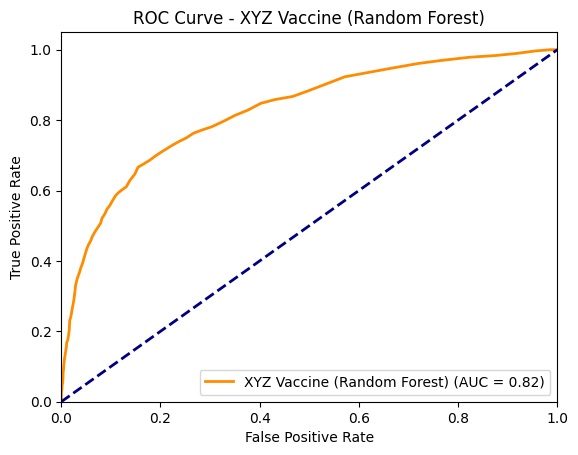

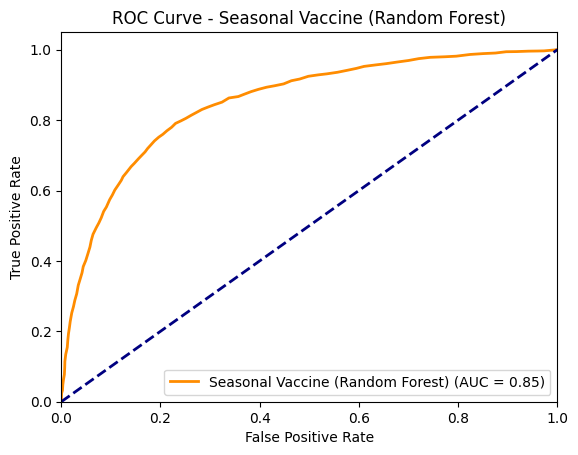

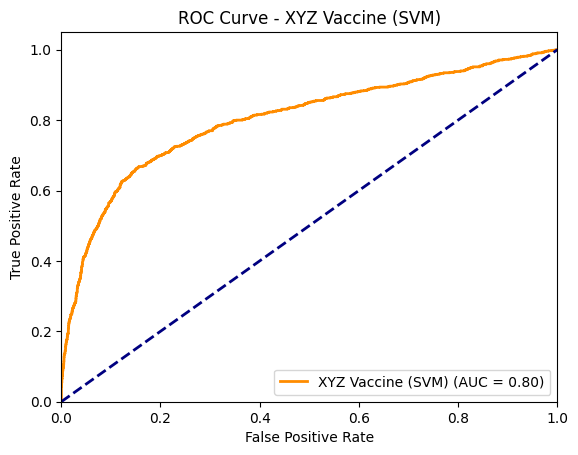

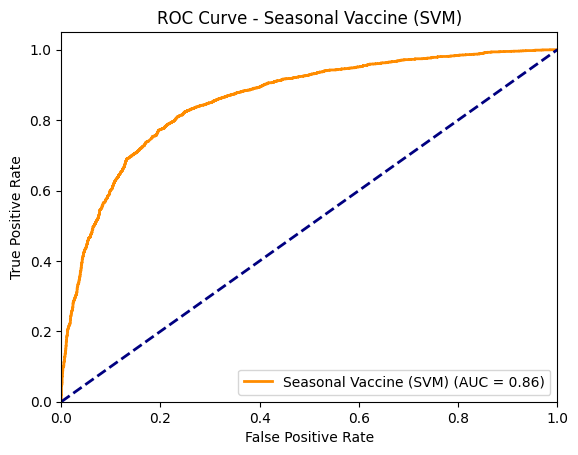

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(model, X_val, y_val, label):
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {label}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for Random Forest models
plot_roc_curve(model_xyz_rf, X_val, y_val_xyz, 'XYZ Vaccine (Random Forest)')
plot_roc_curve(model_seasonal_rf, X_val, y_val_seasonal, 'Seasonal Vaccine (Random Forest)')

# Plot ROC curves for SVM models
plot_roc_curve(model_xyz_svm, X_val, y_val_xyz, 'XYZ Vaccine (SVM)')
plot_roc_curve(model_seasonal_svm, X_val, y_val_seasonal, 'Seasonal Vaccine (SVM)')


In [ ]:
y_pred_proba_xyz_svm = model_xyz_svm.predict_proba(testF.iloc[:, 1:])[:, 1]
y_pred_proba_seasonal_svm = model_seasonal_svm.predict_proba(testF.iloc[:, 1:])[:, 1]

svm_submission_df = pd.DataFrame({
    'respondent_id': testF.iloc[:, 0],
    'xyz_vaccine': y_pred_proba_xyz_svm,
    'seasonal_vaccine': y_pred_proba_seasonal_svm
})

svm_submission_df.to_csv('svm_submission.csv', index=False)

In [ ]:
y_pred_proba_xyz_rf = model_xyz_rf.predict_proba(testF.iloc[:, 1:])[:, 1]
y_pred_proba_seasonal_rf = model_seasonal_rf.predict_proba(testF.iloc[:, 1:])[:, 1]


rf_submission_df = pd.DataFrame({
    'respondent_id': testF.iloc[:, 0],
    'xyz_vaccine': y_pred_proba_xyz_rf,
    'seasonal_vaccine': y_pred_proba_seasonal_rf
})

rf_submission_df.to_csv('rf_submission.csv', index=False)


## Traning the With Scaled Data

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming `train_data` and `testF` are your DataFrames, and `numerical_cols` is defined as in your previous code
numerical_cols = train_data.columns.difference(['respondent_id', 'xyz_vaccine', 'seasonal_vaccine'])

test_respondent_id = testF['respondent_id']


scaler = StandardScaler()

train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
testF[numerical_cols] = scaler.transform(testF[numerical_cols])

test_data = pd.concat([test_respondent_id, testF[numerical_cols]], axis=1)

In [76]:
print(train_data.head(3))
print(test_data.head(3))

   respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              0          1.0            0.0                        0.0   
1              1          3.0            2.0                        0.0   
2              2          1.0            1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   

   behavioral_touch_face  ...  hhs_geo_region_kbazzjca  \
0                    1.0  ...                    False   
1                    1.0  ...                    False   

In [77]:
X = train_data.drop(columns=['respondent_id', 'xyz_vaccine', 'seasonal_vaccine'])
y_xyz = train_data['xyz_vaccine']
y_seasonal = train_data['seasonal_vaccine']


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train_xyz, y_val_xyz = train_test_split(X, y_xyz, test_size=0.2, random_state=42)
X_train, X_val, y_train_seasonal, y_val_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

In [86]:
X_train

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
24706,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,False,False,False,False,True,False,False,False,False,False
5393,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,False,False,False,False,True,False,False,False,False,False
20898,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
3429,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
8731,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,True,True,False
5390,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,True,False,False,True,False
860,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,True,False,True
15795,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,False,False,True,False,False,False,False,False,True,False


In [79]:
from sklearn.ensemble import RandomForestClassifier

model_xyz_rf = RandomForestClassifier(random_state=42)
model_seasonal_rf = RandomForestClassifier(random_state=42)

model_xyz_rf.fit(X_train, y_train_xyz)
model_seasonal_rf.fit(X_train, y_train_seasonal)

RandomForestClassifier(random_state=42)

In [80]:
from sklearn.svm import SVC

model_xyz_svm = SVC(probability=True, random_state=42)
model_seasonal_svm = SVC(probability=True, random_state=42)

model_xyz_svm.fit(X_train, y_train_xyz)
model_seasonal_svm.fit(X_train, y_train_seasonal)

SVC(probability=True, random_state=42)

In [81]:
from sklearn.metrics import roc_auc_score

# Function to calculate ROC AUC for each model
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict_proba(X_val)[:, 1]
    return roc_auc_score(y_val, y_pred)


In [82]:
# Evaluate Random Forest models
rf_xyz_auc = evaluate_model(model_xyz_rf, X_val, y_val_xyz)
rf_seasonal_auc = evaluate_model(model_seasonal_rf, X_val, y_val_seasonal)

# Evaluate SVM models
svm_xyz_auc = evaluate_model(model_xyz_svm, X_val, y_val_xyz)
svm_seasonal_auc = evaluate_model(model_seasonal_svm, X_val, y_val_seasonal)

# Print results
print("Random Forest:")
print(f"XYZ Vaccine ROC AUC: {rf_xyz_auc:.4f}")
print(f"Seasonal Vaccine ROC AUC: {rf_seasonal_auc:.4f}")
print("\nSupport Vector Machines (SVM):")
print(f"XYZ Vaccine ROC AUC: {svm_xyz_auc:.4f}")
print(f"Seasonal Vaccine ROC AUC: {svm_seasonal_auc:.4f}")

Random Forest:
XYZ Vaccine ROC AUC: 0.8249
Seasonal Vaccine ROC AUC: 0.8486

Support Vector Machines (SVM):
XYZ Vaccine ROC AUC: 0.8025
Seasonal Vaccine ROC AUC: 0.8576


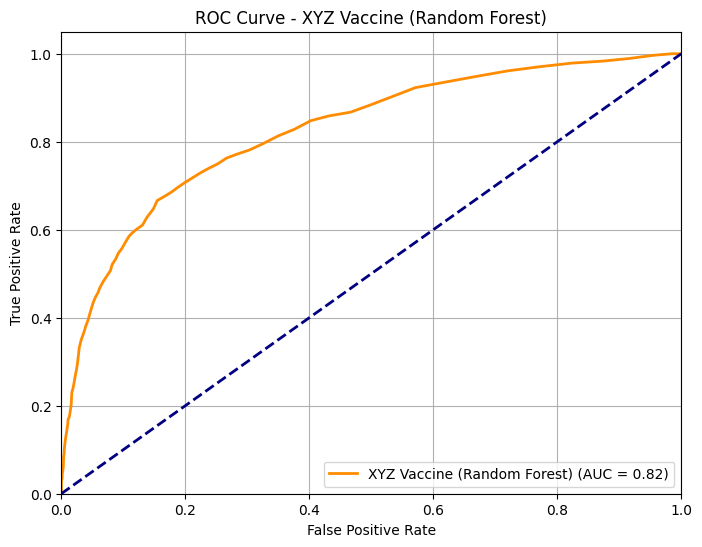

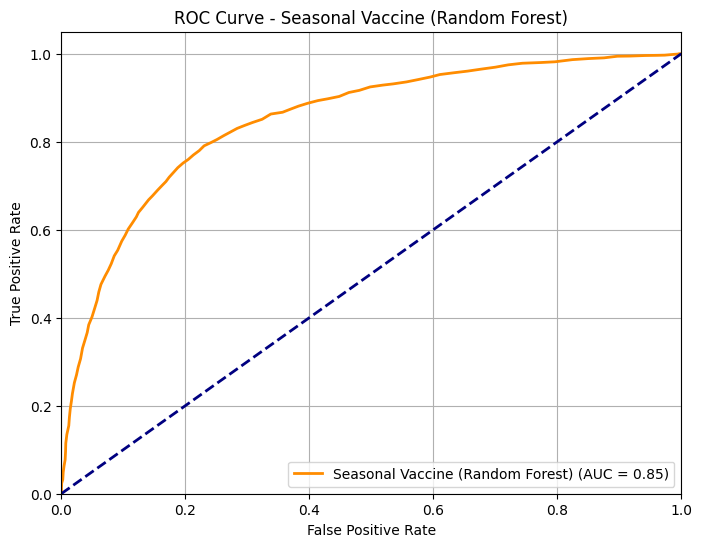

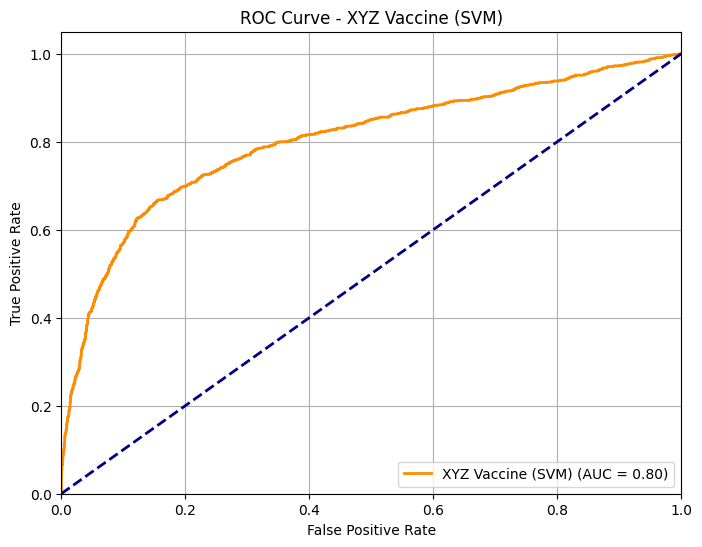

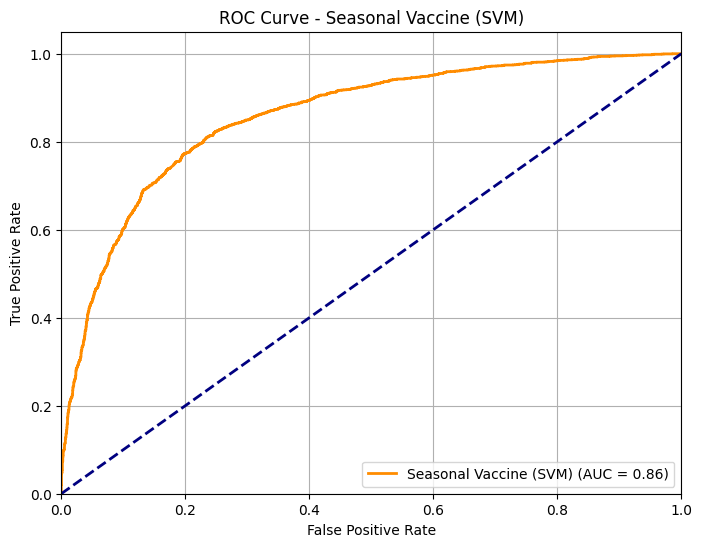

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(model, X_val, y_val, label):
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {label}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Plot ROC curves for Random Forest models
plot_roc_curve(model_xyz_rf, X_val, y_val_xyz, 'XYZ Vaccine (Random Forest)')
plot_roc_curve(model_seasonal_rf, X_val, y_val_seasonal, 'Seasonal Vaccine (Random Forest)')

# Plot ROC curves for SVM models
plot_roc_curve(model_xyz_svm, X_val, y_val_xyz, 'XYZ Vaccine (SVM)')
plot_roc_curve(model_seasonal_svm, X_val, y_val_seasonal, 'Seasonal Vaccine (SVM)')
